<H1>ANALISIS DEL COMPORTAMIENTO DE LA DEMANDA DE OCUPACIÓN HOTELERA.<H1/>

Presentado por:
- Juan Manuel Rivera  - 201534131
- Johana Alejandra Rátiva - 202513844

Con este analisis se busca mejorar las estrategias para garantizar la ocupación a partir de la toma decisiones acertada en cuanto a 
* Politica de precios 
* Gestión de cancelaciones 
* Anticipación de las reservas

## Etapa 1 : Entendimiento de los datos

En esta primera visualización podemos entender la unidad minima de analisis la cual es la reserva, no es el cliente ni el hotel, lo cual nos da un contexto del dataset. 
También nos permite revisar la estructura de las columnas y plantear algunas preguntas que permitiran limpiar los datos o avanzar con el entendimiento del problema.

En este punto surgen preguntas como:
* Las reservas canceladas tienen mes de llegada? : No, la variable es consistente
* La variable kids puede resumir a las variables children y babys? : No, es una variable con muchos nulos
* Que tamaño tiene el dataset :  58895 filas y 33 columnas
* Con qué tipo de datos contamos?
* Existen errores de tipeo?


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [3]:
# Cargar CSV
df = pd.read_csv('./data/hotel_bookings_modified.csv')

df.head(10)


C:\Users\jarat\AppData\Local\Temp\ipykernel_2132\1894450639.py:2: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/hotel_bookings_modified.csv')


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids
0,Resort Hotel,0,342,2015.0,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01,NaN
1,Resort Hotel,0,737,2015.0,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01,NaN
2,Resort Hotel,0,7,2015.0,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02,NaN
3,Resort Hotel,0,13,2015.0,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02,NaN
4,Resort Hotel,0,14,2015.0,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03,NaN
5,Resort Hotel,0,14,2015.0,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03,NaN
6,Resort Hotel,0,0,2015.0,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0.0,Transient,107.0,0.0,0.0,Check-Out,2015-07-03,NaN
7,Resort Hotel,0,9,2015.0,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0.0,Transient,103.0,0.0,1.0,Check-Out,2015-07-03,NaN
8,Resort Hotel,1,85,2015.0,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0.0,Transient,82.0,0.0,1.0,Canceled,2015-05-06,NaN
9,Resort Hotel,1,75,2015.0,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0.0,Transient,105.5,0.0,0.0,Canceled,2015-04-22,NaN


1.1. Tamaño del dataframe

In [4]:
# Inspección básica
df.shape              # Filas y columnas

print("El dataframe tiene {} filas y {} columnas.".format(df.shape[0], df.shape[1]))

El dataframe tiene 58895 filas y 33 columnas.


1.2. Inspección de tipos de datos 

In [5]:
df.info()           # Tipos de datos y nulos


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58895 entries, 0 to 58894
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           58895 non-null  object 
 1   is_canceled                     58895 non-null  int64  
 2   lead_time                       58895 non-null  int64  
 3   arrival_date_year               58307 non-null  float64
 4   arrival_date_month              58895 non-null  object 
 5   arrival_date_week_number        58895 non-null  int64  
 6   arrival_date_day_of_month       58895 non-null  int64  
 7   stays_in_weekend_nights         58895 non-null  int64  
 8   stays_in_week_nights            58895 non-null  int64  
 9   adults                          58895 non-null  int64  
 10  children                        58891 non-null  float64
 11  babies                          58895 non-null  int64  
 12  meal                            

Esta inspección nos permite identificar datos con muchos nulos como kids y company, que si bien pueden ser variables utiles para analisis particulares, no son relevante para entender el comportamiento de la generalidad de las reservas debido precisamente a la ausencia de datos.

Adicionalmente nos permite identificar la necesidad de algunos ajustes que deben realizarse en la etapa de limpieza y enriquecimiento. Entre ellos:

* is_canceled es una variable de tipo entero que puede transformarse a bool para facilitar la lectura e interpretación.
* lead_time es una variable cuantitativa discreta que puede enriquecerse como cualitativa ordinal que permite darle una lectura propia del negocio hotelero.
* arrival_date_month es una variable categorica que puede enriquecerse dandole un caracter de categorica ordinal
* reservation_status_date es una variable cuantitativa discrea y podemos transformarla a categorica ordinal para usarla en la busqueda de grupos de clientes

Adicionalmente adjuntamos un diccionario enriquecido con los tipos de variable estadistica, resaltando a priori las variables que consideramos relevantes, sin embargo las variables mas importantes que elegimos son:

- **hotel**: indica si el hotel es rural o urbano
- **is_canceled**: indica si la reserva fue cancelada
- **lead_time**: cuántos días han pasado entre que se crea la reserva y la fecha de llegada
- **adr**: tarifa promedio por día
- **arrival_date_month**: mes de llegada

![Texto alternativo](tabla_tipos_datos.jpg)




## Etapa 2: Limpieza y enriquecimiento del dataset.

En esta etapa buscamos encontrar errores de consistencia y completitud que nos permitan garantizar que los datos elegidos son optimos para los analisis. Por otra parte damos el caracter al dato dado en el diccionario lo que facilita su lectura (Convertir a booleano y garantizar variables ordinales).

Generamos variables adicionales como estacion_anio y tipo_reserva. 

* Revision y ajuste de variables categoricas

In [22]:
# Se convertirá la columna de cancelación a valores booleanos
df['is_canceled'] = df['is_canceled'].replace({0: False, 1: True})

# Se corrigen valores atípicos en la fecha de llegada
df['arrival_date_year'] = df['arrival_date_year'].replace({20016.: 2016.})

# Se convertirá la columna si el husped ya se había alojado previamente
df['is_repeated_guest'] = df['is_repeated_guest'].replace({0: False, 1: True})

# Inspeccionar valores unicos de arrival_date_month
df['arrival_date_month'].unique()

# Convertir la columna a categórica ordinal
df['arrival_date_month'] = pd.Categorical(
    df['arrival_date_month'],
    categories=["January", "February", "March", "April", "May", "June","July", "August", "September", "October", "November", "December"],
    ordered=True
)

print("La columna 'arrival_date_month' ha sido convertida a categórica ordinal.")
print(df['arrival_date_month'].unique())

La columna 'arrival_date_month' ha sido convertida a categórica ordinal.
['July', 'August', 'September', 'October', 'November', ..., 'February', 'March', 'April', 'May', 'June']
Length: 12
Categories (12, object): ['January' < 'February' < 'March' < 'April' ... 'September' < 'October' < 'November' < 'December']


Como queremos analizar si existe alguna relación entre la temporada del año y las reservas es necesario darle un tratamiento a la varaible de mes de llegada para su uso posterior.

In [27]:
# Diccionario que mapea cada mes a su estación en el hemisferio norte
mes_a_estacion = {
    "December": "Otoño", "January": "Invierno", "February": "Invierno",
    "March": "Invierno", "April": "Primavera", "May": "Primavera",
    "June": "Primavera", "July": "Verano", "August": "Verano",
    "September": "Verano", "October": "Otoño", "November": "Otoño"
}

# Aplicamos el mapeo a la columna arrival_date_month
df["estacion_anio"] = df["arrival_date_month"].map(mes_a_estacion)

print("Se ha creado la columna 'estacion_anio' basada en 'arrival_date_month'.")
print (df['estacion_anio'].unique())


Se ha creado la columna 'estacion_anio' basada en 'arrival_date_month'.
['Verano' 'Otoño' 'Invierno' 'Primavera']


* Revisión devalores unicos

In [9]:
# revision de valores unicos par variables cualitativas
print(df.select_dtypes(include=['object', 'category']).columns)

print(df['hotel'].unique())

print(df['arrival_date_month'].unique())  

print(df['meal'].unique()) 

print(df['customer_type'].unique())  

print(df['assigned_room_type'].unique())  

print(df['deposit_type'].unique())  

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'company', 'customer_type', 'reservation_status',
       'reservation_status_date', 'estacion_anio'],
      dtype='object')
['Resort Hotel' 'City Hotel']
['July', 'August', 'September', 'October', 'November', ..., 'February', 'March', 'April', 'May', 'June']
Length: 12
Categories (12, object): ['January' < 'February' < 'March' < 'April' ... 'September' < 'October' < 'November' < 'December']
['BB' 'FB' 'HB' 'SC' 'Undefined']
['Transient' nan 'Contract' 'Transient-Party' 'Group']
['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']
['No Deposit' 'Refundable' 'Non Refund' 'No Refund']


Podemos evidenciar que las variables categoricas son consistentes y podemos avanzar si realizar actividades de limpieza para ellas. Es llamativo que para la variable customer type existen valores en nan, los cuales tendriamos que entrar a validar y trabajar de forma especial si decidimos trabajar con esta varaible.

In [24]:
# Analisis de consistencia 
# las reservas canceladas tienen mes de llegada?
df[(df['is_canceled'] == True) & (df['arrival_date_month'].isnull())]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids,estacion_anio,tipo_reserva


Se evidencia consistencia entre dos de las variables elgidas. Dado que una reserva cancelada no deberia tener mes de llegada, lo cual se comprobó en la caja anterior. Esto fortalece nuestro analisis y nos da paso a poder utilizarlas posteriormente. 


* Revision de variables cuantitativas

* ADR

In [11]:
#Estadisticas descriptivas de la variable adr para evidenciar posibles valores atipicos
df['adr'].describe()

count    58894.000000
mean        96.250426
std         58.555599
min         -6.380000
25%         60.000000
50%         84.000000
75%        120.000000
max       5400.000000
Name: adr, dtype: float64

In [12]:
# Remplazo de valor negativo
df['adr'] = df['adr'].replace({-6.38: 6.38})

Podemos evidenciar que la variable adr presenta una mediana cercana a su media a pesar del valor maximo de 5400, esto nos puede dar indicios de que se trata de un valor maximo atipico y podria tratarse de un hotel de lujo o un dato mal digitado. 

También optamos por remplazar el valor negativo teniendo en cuenta que no deberian existir valores promedio por noche en negativo.


Revisión de valores en 0 para adr

In [13]:
#Revisión de valores en cero en relación con las cancelaciones
df.loc[df['adr'] ==0]['is_canceled'].value_counts(normalize=True)

is_canceled
False    0.865828
True     0.134172
Name: proportion, dtype: float64

In [14]:
df.loc[df['adr'] ==0].shape[0] / df.shape[0]  # Porcentaje de datos con adr en 0

0.01619831904236353

Realizando esta agrupación podemos ver que los valores de 0 no necesariamente estan asociados a cancelaciones, lo que puede mostrarnos que estos datos son valores erroneos o que se trata de promociones otorgadas en la reserva dado que también coincide con un 13% de cancelaciones que nos da indicios de que los clientes no cancelan un beneficio otorgado. Para este caso vamos a ignorar estos datos dado que no es fruto del analisis considerar promociones y teniendo en cuenta que la cantidad de datos nulos es baja -> 1% de los datos

In [15]:
df = df[df['adr'] != 0]  # Filtrar filas donde adr no es 0
df.shape
print("El dataframe tiene ahora {} filas y {} columnas.".format(df.shape[0], df.shape[1]))

El dataframe tiene ahora 57941 filas y 34 columnas.


* lead_time

In [16]:
# Estadisticas descriptivas para lead_time y evidenciar necesidad de limpieza
df[["lead_time"]].describe()


,lead_time
count,57941.000000
mean,100.858218
std,101.174362
min,0.000000
25%,17.000000
50%,70.000000
75%,158.000000
max,709.000000


La variable **lead_time** muestra un promedio de 100 dias, valor que se encuentra a la derecha de la mediana lo que muestra una distribución asimetrica a la derecha lo que quiere decir que hay valores altos jalando la media pero el 75% de datos se encuentran en valores por debajo de 157 dias.

Para enriquecer el dataframe y permitir analisis entre variables cualitativas vamos a calcular una variable categorica a partir de lead_time. Esto lo podemos realizar a partir de premisas del negocio o apartir de comportamiento estadistico.

Queremos determinar 4 grupos
* Reserva de ultimo minuto (0 a 7 dias)
* Reserva de corto plazo ( 8 a 30 dias )
* Reserva de mediano plazo (31 a 90 dias)
* Reserva de largo plazo ( mas de 90 dias ) 



In [25]:
# Definimos los intervalos (bins) y las etiquetas
bins = [0, 7, 30, 90, float("inf")]
labels = ["Ultimo Minuto", "Corto Plazo", "Mediano Plazo", "Largo Plazo"]

# Creamos la nueva columna categórica
df["tipo_reserva"] = pd.cut(df["lead_time"], bins=bins, labels=labels, include_lowest=True)

print("Se ha creado la columna 'tipo_reserva' basada en 'lead_time'.")
print(df['tipo_reserva'].unique())

Se ha creado la columna 'tipo_reserva' basada en 'lead_time'.
['Ultimo Minuto', 'Corto Plazo', 'Mediano Plazo', 'Largo Plazo']
Categories (4, object): ['Ultimo Minuto' < 'Corto Plazo' < 'Mediano Plazo' < 'Largo Plazo']


## Etapa 3 y Etapa 4: Planteamiento de preguntas y Analisis Exploratorio

En estas etapas buscamos direccionar el entendimiento del negocio a partir de la resolución de preguntas mediante analisis univariado y bivariado sobre las variables priorizadas:

- **hotel**: indica si el hotel es rural o urbano
- **is_canceled**: indica si la reserva fue cancelada
- **lead_time**: cuántos días han pasado entre que se crea la reserva y la fecha de llegada
- **adr**: tarifa promedio por día
- **arrival_date_month**: mes de llegada

Algunas de las preguntas son:

* Se evidencia preferencia sobre los hoteles tipo Resort o City?
* Existe algun comportamiento de mayor llegada de huespedes en verano?
* Las personas reservan con mucho tiempo de anterioridad?
* Los viajes son de negocios y por eso son en la ciudad? o los viajes son de ocio y por eso son en verano y en hoteles Resort?

### Variable: Hotel

In [167]:
df['hotel'].value_counts(normalize=True)
# El 67 por ciento de las reservas son para hotel tipo resort

hotel
Resort Hotel    0.678483
City Hotel      0.321517
Name: proportion, dtype: float64

<Axes: ylabel='proportion'>

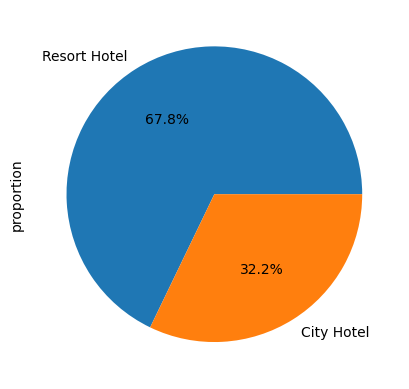

In [168]:
df['hotel'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')

La distribución de reservas en los dos tipos de hotel nos muestra que en su mayoria se trata de reservas sobre Hoteles de tipo Resort, lo que da paso a preguntarnos si las reservas son mas de tipo vacacional que de trabajo y por ende puedan estar concentradas en temporadas del año como verano.  

### Variable is_canceled

In [169]:
# calculo de frecuencia absoluta para la variable cancelaciones
df['is_canceled'].value_counts(normalize=True)  # Para categóricas


is_canceled
False    0.584042
True     0.415958
Name: proportion, dtype: float64

Aqui podemos evideniar un universo de datos mas o menos balanceado en donde contamos con al menos 41 % de los datos sobre cancelaciones, de esta manera si podemos realizar analisis para buscar las razones y como contener cancelaciones. Si la proporción fuera baja, tendriamos que descartar la evaluación de cancelaciones por falta de datos, pero no es el caso.

### Variable derivada tipo_reserva

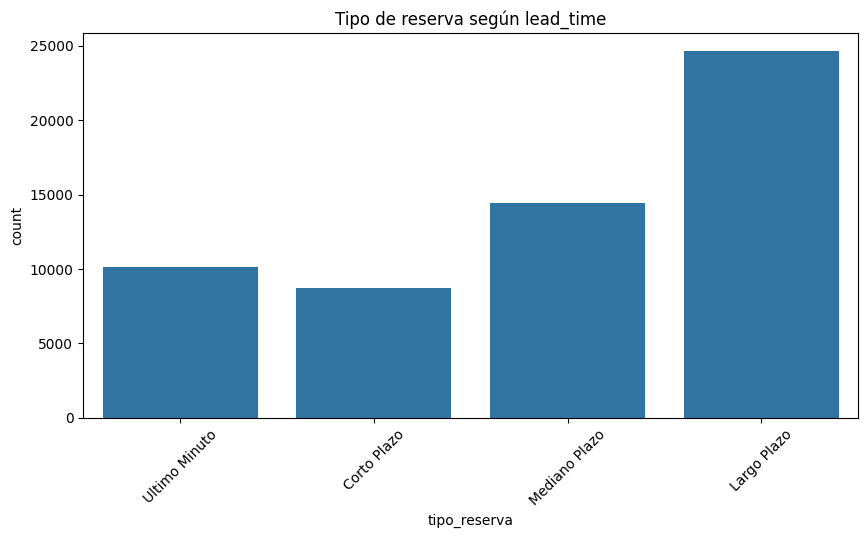

In [26]:
# tipo de reserva según lead_time
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='tipo_reserva', order=labels)
plt.xticks(rotation=45)
plt.title("Tipo de reserva según lead_time")
plt.show()

Se puede evidenciar un comportamiento predominante en las reservas de largo plazo, las cuales corresponden a reservas realizadas con mas de 90 días de anticipación.

### Variable arival_date_month

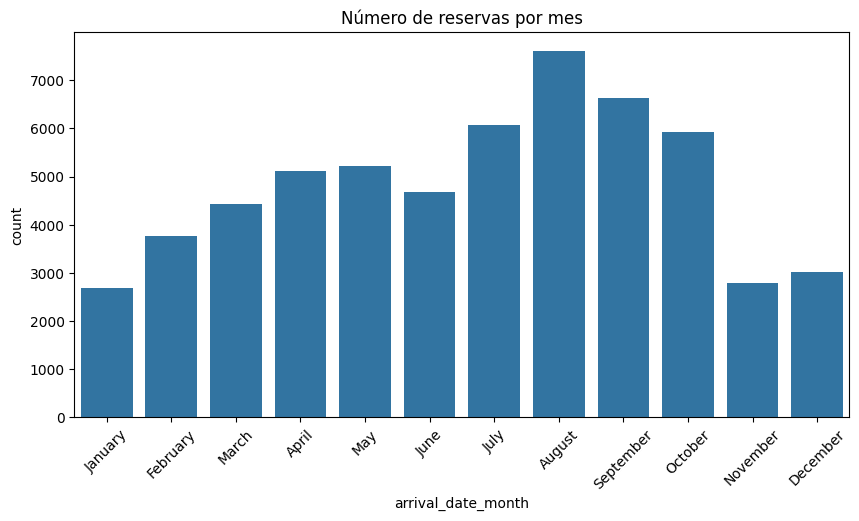

In [20]:
# Ahora podemos graficar la variable arrival_date_month de forma ordenada
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='arrival_date_month', order=df['arrival_date_month'].cat.categories)
plt.xticks(rotation=45)
plt.title("Número de reservas por mes")
plt.show()

Podemos evidenciar que los meses con mayor numero de llegadas son los meses correspondientes a la temporada de verano, lo cual se alinea con la predominancia de hoteles de tipo resort, con ello podemos concluir que los usuarios de esta muestra tienen un comportamiento predominante de elegir al hotel para viajes de ocio

### Variable derivada estacion_anio

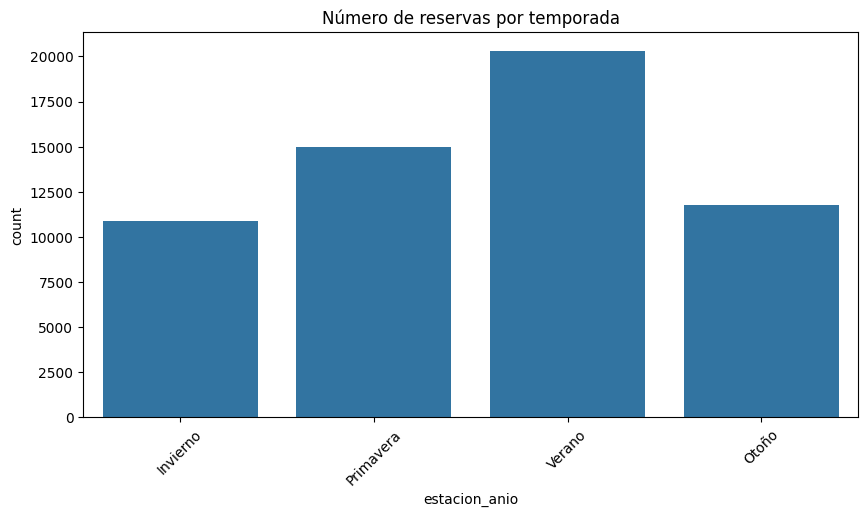

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='estacion_anio', order=["Invierno", "Primavera", "Verano", "Otoño"])
plt.xticks(rotation=45)
plt.title("Número de reservas por temporada")
plt.show()

Nuevamente evidenciamos la predominancia de las reservas en verano y primavera, mientras que temporadas como otoño e invierno tienen un nivel de reserva inferior 

### Variable lead_time

In [33]:
df["lead_time"].describe(percentiles=[0.25,0.50,0.75,0.90, 0.95, 0.99])  # Para numéricas

count    57941.000000
mean       100.858218
std        101.174362
min          0.000000
25%         17.000000
50%         70.000000
75%        158.000000
90%        252.000000
95%        309.000000
99%        412.000000
max        709.000000
Name: lead_time, dtype: float64

La variable **lead_time** muestra un promedio de 100 dias, valor que se encuentra a la derecha de la mediana lo que muestra una distribución asimetrica a la derecha lo que quiere decir que hay valores altos jalando la media pero el 95% de datos se encuentran en valores por debajo de 309 dias, es decir reservas con menos de un año de anticipación.

In [30]:
df["lead_time"].mode()  

0    0
Name: lead_time, dtype: int64

Text(0.5, 1.0, 'Distribución de lead_time')

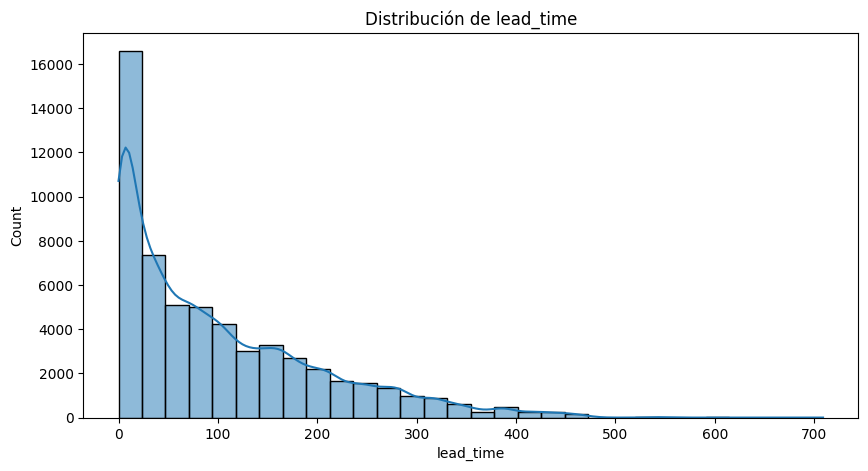

In [174]:
# Para determinar los mejores intervalos para lead_time, se puede usar un histograma
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='lead_time', bins=30, kde=True)
plt.title("Distribución de lead_time")




Podemos ver que a pesar de en el diagrama de barras realizado previamente en donde se veian las reservas de largo plazo predominando sobre las demas, aqui evidenciamos que el valor que mas se repite para lead_time es el 0 lo que evidencia que es comun que las personas acceden al hotel el dia que lo visitan.

El histograma nos permite evidenciar que el comportamiento que predomina es el de los clientes que reservan con poca anticipacion, sin embargo hay un 50% de reservas que evidencian un comportamiento de  planeacion de mediano y largo plazo, es decir mayor 70 dias de antelacion.

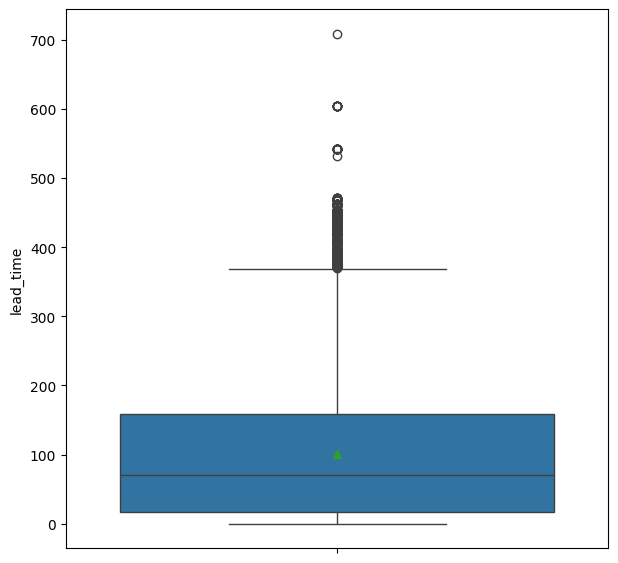

In [ ]:
# boxPlot lead_time
plt.figure(figsize=(7, 7))
sns.boxplot(
    data=df,
    y='lead_time',
    showmeans=True
)
plt.show()

Al realizar el box plot evidenciamos que se presentan como atipicos los datos de las reservas realizadas con mayor anticipacion sin embargo estos datos pueden estar mostrando la realidad del negocio dado que existe un numero de reservas alto para la temporada de verano podemos asumir que las reservas son de tipo vacacional y pueden realizarse con un tiempo considerable de anticipación.

### Variable adr

In [177]:
#Estadisticas adr
df['adr'].describe(percentiles=[0.90, 0.95, 0.99])


count    57940.000000
mean        97.835440
std         57.707195
min          0.260000
50%         85.000000
90%        172.000000
95%        208.432500
99%        269.000000
max       5400.000000
Name: adr, dtype: float64

Como evidenciamos en etapas previas, la variable adr tiene una media cercana a su mediana lo cual parece que presenta un comportamiento normal, sin embargo existe un atipico de 5400 unidaes monetarias que de incluirlo en los analisis posteriores nos haria perder detalle dado que la variable tiene su 99% con valores menores a 269.

In [35]:
print("Antes de quitar el valor atipico de 5400")
print(str(df.shape[0]))
df = df[df['adr'] < 5400]  
df.shape

Antes de quitar el valor atipico de 5400
57941


(57939, 35)

In [36]:
df['adr'].describe(percentiles=[0.90, 0.95, 0.99])


count    57939.000000
mean        97.743927
std         53.338024
min          0.260000
50%         85.000000
90%        172.000000
95%        208.412000
99%        269.000000
max        508.000000
Name: adr, dtype: float64

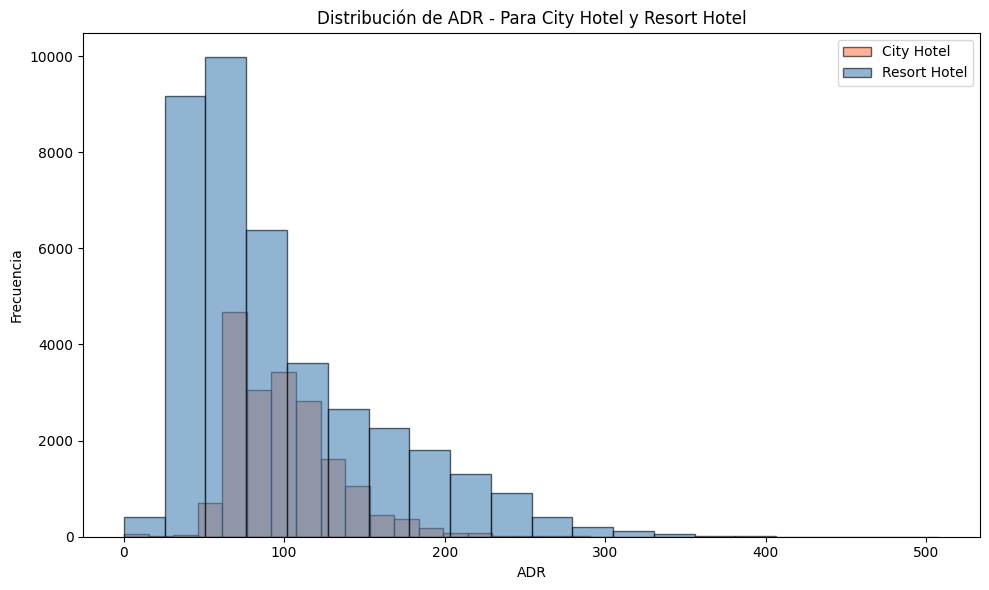

In [37]:
import matplotlib.pyplot as plt

# Filtrar los datos
city_adr = df.loc[(df['hotel'] == 'City Hotel'), 'adr']
resort_adr = df.loc[(df['hotel'] == 'Resort Hotel') , 'adr']

# Crear el histograma solapado
plt.figure(figsize=(10,6))
plt.hist(city_adr, bins=20, alpha=0.6, label='City Hotel', color='coral', edgecolor='black')
plt.hist(resort_adr, bins=20, alpha=0.6, label='Resort Hotel', color='steelblue', edgecolor='black')

# Personalizar el gráfico
plt.title('Distribución de ADR - Para City Hotel y Resort Hotel')
plt.xlabel('ADR')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()
## hacer esta misma grafica pero con cancelado y no cancelado

Con el histograma anterior podemos evidenciar que los precios promedio por noche comparten el intervalo para los dos tipos de hotel con una media de 97.7 mas o menos 53.33.
De nuevo volvemos a notar que predominan las reservaciones asociadas a hoteles tipo Resort

### Analisis bivariado

* Proporción de cancelaciones por tipo de hotel

In [170]:
# Proporcion de cancelaciones por tipo de hotel 
pd.crosstab(df['hotel'], df['is_canceled'],normalize='index')

is_canceled,False,True
hotel,,
City Hotel,0.298889,0.701111
Resort Hotel,0.719170,0.280830


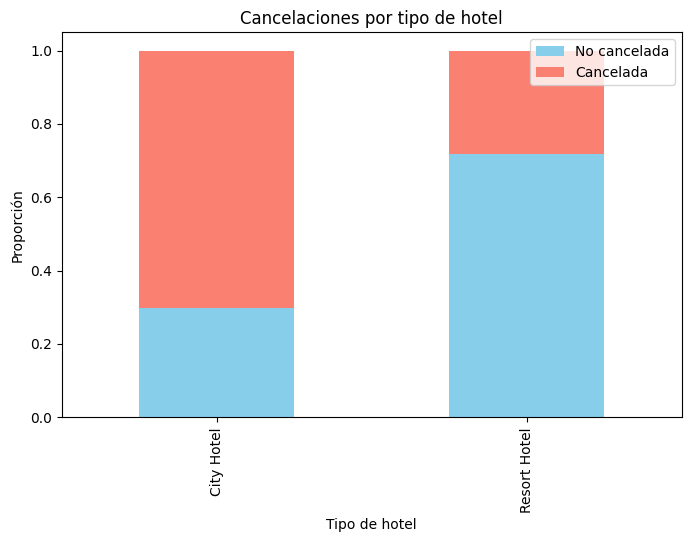

In [39]:

ct = pd.crosstab(df['hotel'], df['is_canceled'], normalize='index')

ct.plot(kind='bar', stacked=True, figsize=(8,5), color=['skyblue', 'salmon'])
plt.ylabel("Proporción")
plt.xlabel("Tipo de hotel")
plt.legend(["No cancelada", "Cancelada"], loc="upper right")
plt.title("Cancelaciones por tipo de hotel")
plt.show()


In [45]:
# Porcentaje de cancelaciones por estacion del año
(pd.crosstab(df["estacion_anio"], df["is_canceled"], normalize='columns') * 100).round(2)

is_canceled,False,True
estacion_anio,,
Invierno,21.48,14.97
Otoño,22.92,16.54
Primavera,22.51,30.66
Verano,33.08,37.84


In [44]:
# Porcentaje de cancelaciones por tipo de reserva
(pd.crosstab(df["tipo_reserva"], df["is_canceled"], normalize='columns') * 100).round(2)

is_canceled,False,True
tipo_reserva,,
Ultimo Minuto,26.33,5.17
Corto Plazo,16.76,12.55
Mediano Plazo,23.11,27.50
Largo Plazo,33.80,54.77


Al revisar el comportamiento de la variable cancelación versus el tipo de hotel podemos identificar que existe mayor porcentaje de cancelaciones en los hoteles de ciudad.   <span style="color:red"> *Ademas La mayoría de cancelaciones están concentradas en reservas planeadas para llegar en verano que fueron hechas a largo plazo. *</span>
 


* Las cancelaciones estan relacionadas con el precio por noche?

<Axes: xlabel='is_canceled', ylabel='adr'>

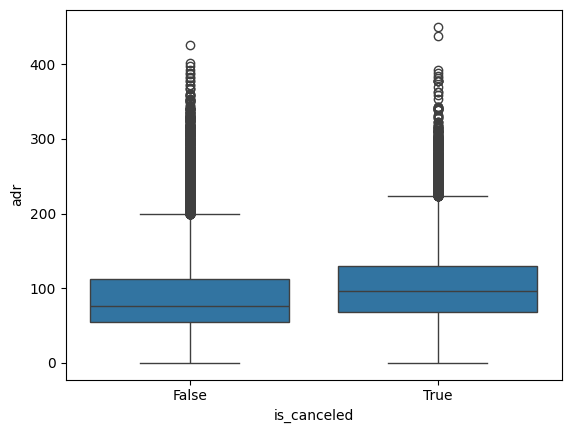

In [101]:
sns.boxplot(x='is_canceled', y='adr', data=df.loc[df['adr'] < 500])

In [100]:
df.loc[df["is_canceled"] == True, "adr"].describe()

count    24099.000000
mean       105.456479
std         50.799219
min          0.500000
25%         68.000000
50%         96.000000
75%        130.000000
max        450.000000
Name: adr, dtype: float64

Podemos evidenciar que las cancelaciones se dan en su mayoria dentro de un rango de precios de 0 a 130 unidades monetarias. Podemos intuir que las cancelaciones no tienen relación con el precio promedio por noche dado que su distribución comparte el rango de precios e incluso incluye atipicos para ambos casos, evidenciando que hubo cancelaciones en precios altos como también reservas efectivas asociadas a precios altos.

* Comportamiento de la variable adr por tipo de hotel

<Axes: xlabel='hotel', ylabel='adr'>

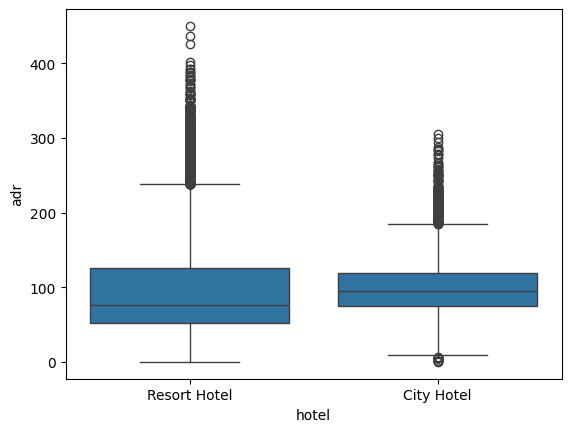

In [103]:
sns.boxplot(x='hotel', y='adr', data=df.loc[df['adr'] < 500])

In [110]:
df.loc[df['hotel'] =='City Hotel', 'adr'].describe(percentiles=[0.01,0.25,0.50,0.75,0.90, 0.95, 0.99])

count    18627.000000
mean        99.810555
std         33.080064
min          0.500000
1%          51.970000
25%         75.000000
50%         95.030000
75%        119.000000
90%        140.400000
95%        161.330000
99%        201.859000
max        306.000000
Name: adr, dtype: float64

In [112]:
df.loc[(df['hotel'] =='City Hotel') & (df['adr'] <= 52)].shape

(189, 39)

Se pueden evidenciar atipicos dentro del adr del hotel tipo ciudad. Los valores menores a 52 unidades monetarias corresponden a un 1% de la muestra.


* Existe relación entre el precio promedio por noche y la temporada del año? 

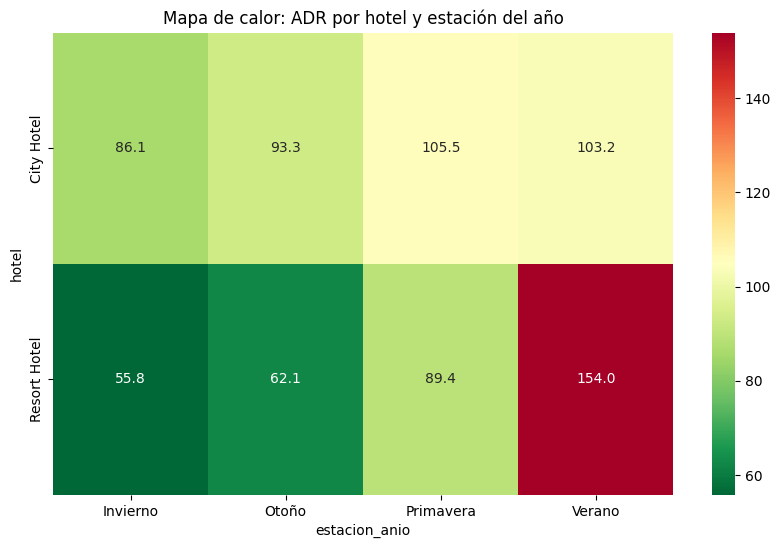

In [50]:

# Crear tabla dinámica: promedio de ADR por hotel y estación
tabla = df.pivot_table(
    index='hotel',
    columns='estacion_anio',
    values='adr',
    aggfunc='mean'  # Puedes usar 'sum', 'count', etc.
)

# Graficar el mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(tabla, annot=True, fmt=".1f", cmap="RdYlGn_r")
plt.title("Mapa de calor: ADR por hotel y estación del año")
plt.show()

Podemos evidenciar que existe mayor valor para hoteles tipo resort en verano como era de esperarse. El grafico anterior también nos permite ver cómo la brecha de precios entre los diferentes tipos de hotel por temporada del año es mas grande en verano y menor en primavera.

  <span style="color:red">Teniendo en cuenta lo anterior vamos a revisar si existe un comportamiento que permita relacionar la brecha entre los precios promedio de hotel tipo resort por temporada del año vs hotel de ciudad con la cancelación.</span>

In [ ]:
#df = df.drop(columns=['resort_mean_adr',''], errors='ignore')


In [76]:
resort_means = (
    df[df['hotel'] == 'Resort Hotel']
    .groupby('estacion_anio')['adr']
    .mean()
    .reset_index()
    .rename(columns={'adr': 'resort_mean_adr'})
)

df = df.merge(resort_means, on='estacion_anio', how='left')
df['price_gap_vs_resort'] =   df['adr'] - df['resort_mean_adr']


In [77]:
df[["is_canceled","hotel","estacion_anio","adr","resort_mean_adr","price_gap_vs_resort"]].loc[df["is_canceled"]==True].sort_values(by="price_gap_vs_resort", ascending=False).sort_values(by="price_gap_vs_resort", ascending=False)

,is_canceled,hotel,estacion_anio,adr,resort_mean_adr,price_gap_vs_resort
9565,True,Resort Hotel,Otoño,384.0,62.104516,321.895484
9604,True,Resort Hotel,Otoño,382.0,62.104516,319.895484
12956,True,Resort Hotel,Verano,450.0,153.952088,296.047912
13205,True,Resort Hotel,Verano,437.0,153.952088,283.047912
9564,True,Resort Hotel,Otoño,340.0,62.104516,277.895484
...,...,...,...,...,...,...
41622,True,City Hotel,Verano,6.0,153.952088,-147.952088
41643,True,City Hotel,Verano,6.0,153.952088,-147.952088
41651,True,City Hotel,Verano,6.0,153.952088,-147.952088
56478,True,City Hotel,Verano,2.0,153.952088,-151.952088


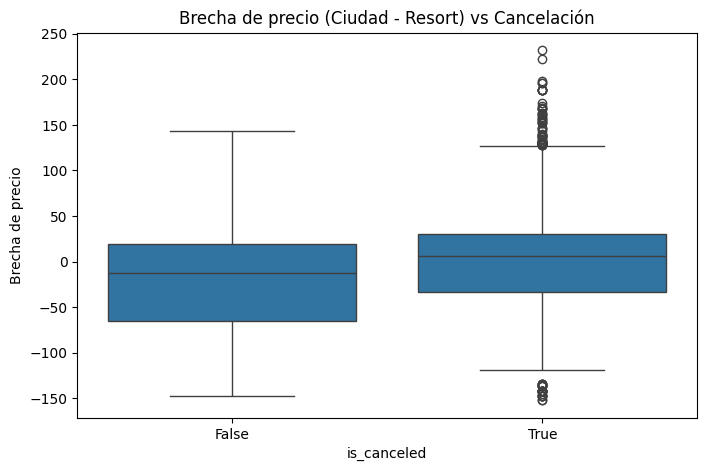

In [116]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df[(df['hotel'] == 'City Hotel') ],
    x='is_canceled',
    y='price_gap_vs_resort'
)
plt.title("Brecha de precio (Ciudad - Resort) vs Cancelación")
plt.ylabel("Brecha de precio")
plt.show()

In [115]:
df.loc[(df["is_canceled"] == True) & (df['adr'] >= 52), "price_gap_vs_resort"].describe()

count    21824.000000
mean         4.970932
std         48.501055
min       -101.592088
25%        -27.394776
50%          6.611698
75%         33.605224
max        321.895484
Name: price_gap_vs_resort, dtype: float64

En el analisis de la variable price_gap_vs_resort se puede evidenciar en el grafico boxplot que las cancelaciones se encuentran concentradas cercanas al cero lo que puede decirnos que las cancelaciones estan propiciadas por el hecho de tener preferencia por hoteles tipo resort sobre los de ciudad y encontrar que lso precios son parecidos lo que pueda llevarlos a cancelar reservas realizadas en hoteles de ciudad para elegir reservas realizadas de ultimo minuto en hoteles resort.

* ADR por estacion del año

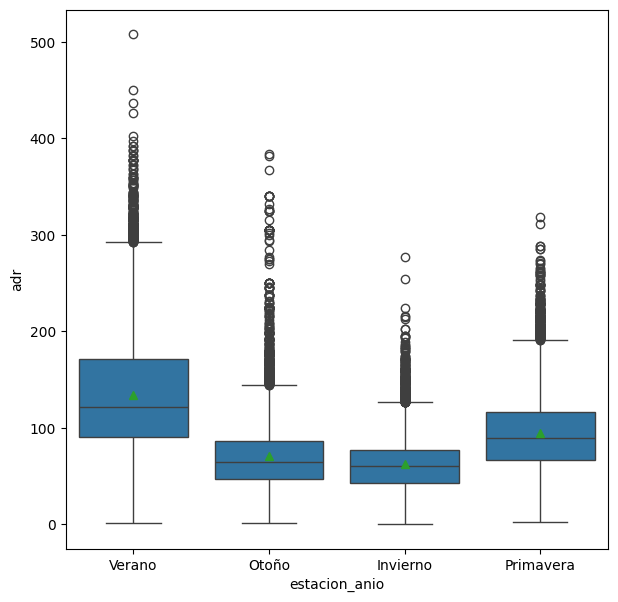

In [ ]:
# Análisis de la variable adr por estación del año

plt.figure(figsize=(7, 7))
sns.boxplot(
    data=df,
    x='estacion_anio',
    y='adr',
    showmeans=True
)
plt.show()

Podemos observar que los precios promedio por noche son mayores para la epoca de verano. Tambien identificamos que existen valores altos en todas las etapas que puedn correspondera al tipo de hotel en lugar de estar relacionados con la estación del año.

* ADR por tipo de reserva

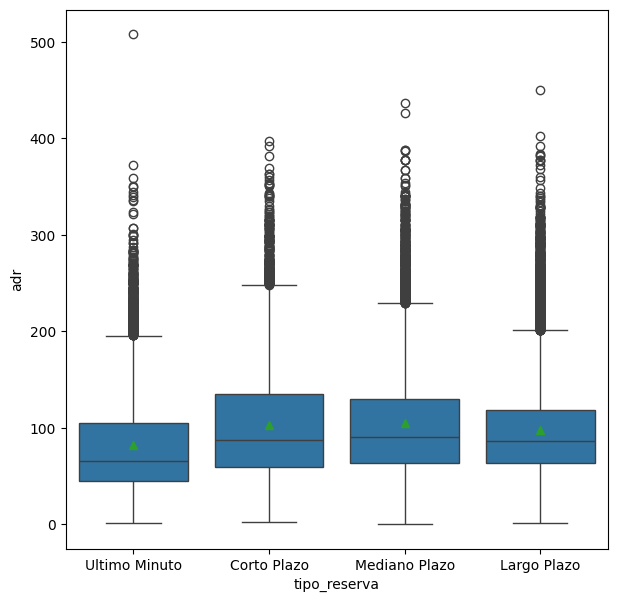

In [120]:
# Análisis de la variable adr por estación del año

plt.figure(figsize=(7, 7))
sns.boxplot(
    data=df,
    x='tipo_reserva',
    y='adr',
    showmeans=True
)
plt.show()

Podemos evideniar que el precio promedio por noche es mas bajo para las reservas de ultimo minuto, esta evidencia parece alinearse para propiciar un ajuste en la politica de precios dado que las reservas de ultimo minuto representan un porcentaje considerable de la muestra dado que la moda es de 0 dias de reserva. Y que estos precios sean bajos puede propiciar las cancelaciones realizadas a largo plazo.

* Cancelacion vs Estacion del anio vs tipo de reserva

C:\Users\jarat\AppData\Local\Temp\ipykernel_2132\1659041553.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tabla = df.pivot_table(


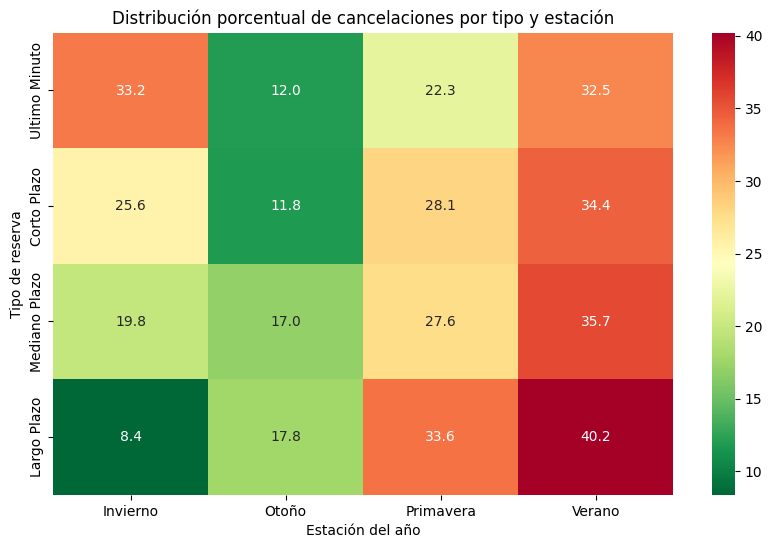

In [124]:
# Tabla de cancelaciones (suma de is_canceled)
tabla = df.pivot_table(
    index='tipo_reserva',
    columns='estacion_anio',
    values='is_canceled',
    aggfunc='sum'  # suma de cancelaciones
)

# Normalizar por fila (cada tipo de reserva suma 100%)
tabla_relativa = tabla.div(tabla.sum(axis=1), axis=0) * 100
tabla_relativa = tabla_relativa.round(1)

# Graficar
plt.figure(figsize=(10, 6))
sns.heatmap(tabla_relativa, annot=True, fmt=".1f", cmap="RdYlGn_r")
plt.title("Distribución porcentual de cancelaciones por tipo y estación")
plt.xlabel("Estación del año")
plt.ylabel("Tipo de reserva")
plt.show()


En el grafico anterior podemos identificar que en verano de manera general existe mayor numero de cancelaciones, lo que se alinea con la interpretación de la demanada como unos usuarios que preferirian pasar sus vacaciones en un hotel de tipo resort.

En este punto también surge una alera al encontrarlas reservas de ultimo minuto con un porcentaje alto de cancelacion en el invierno, lo cual podria deberse también a la interpretación que se le dió a las estaciones del año ignorando el hemisferio del pais.




## Etapa 5: Validación de Hipotesis y Conclusiones

H0: la media de la brecha de precios es igual para canceladas y no canceladas.
H1: la media de la brecha de precios es distinta para reservas canceladas y no canceladas


In [135]:
# prueba t de student para diferencia de medias ### 

from scipy.stats import ttest_ind

city = df[df['hotel'] == 'City Hotel']
gap_canceled = city[city['is_canceled'] == True]['price_gap_vs_resort']
gap_not_canceled = city[city['is_canceled'] == False]['price_gap_vs_resort']

t_stat, p_val = ttest_ind(gap_canceled, gap_not_canceled, equal_var=False)
print("T-test:", t_stat, "p-value:", p_val)

# T-test: 27.110533124721382 p-value: 1.371630574239274e-156


T-test: 27.110533124721382 p-value: 1.371630574239274e-156


p-value ≪ 0.05 → rechazas la hipótesis nula (H₀: la media de la brecha de precios es igual para canceladas y no canceladas).

Conclusión: existe una diferencia estadísticamente significativa en el price_gap_vs_resort entre reservas canceladas y no canceladas en hoteles de ciudad.

El valor tan bajo del p-value indica que la diferencia no es producto del azar.

Si el precio del hotel de ciudad se acerca demasiado (o supera) al promedio de un resort en el mismo mes, los clientes tienden a cancelar más.

Esto respalda tu hipótesis de que la política de precios en ciudad debería ajustarse en verano para mantener una diferencia clara respecto a los resorts.

* la proporcion de cancelaciones en reservas de largo plazo es mas alta que la proporcion de cancelaciones en corto plazo?